In [22]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
from scipy import stats

In [23]:
n_params = [1, 2, 4]
p_params = [0.25, .5, .75]
x = np.arange(0, max(n_params) + 1)

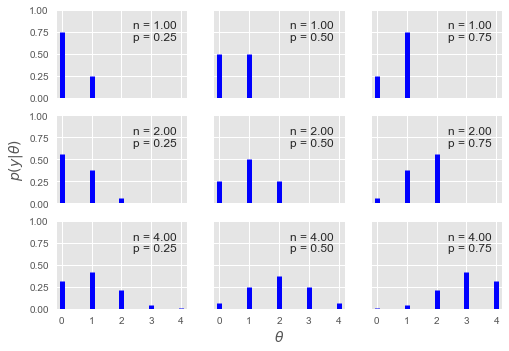

In [25]:
f, ax = plt.subplots(len(n_params), len(p_params), sharex = True, sharey=True)
for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i, j].vlines(x, 0, y, colors='b', lw=5)
        ax[i, j].set_ylim(0, 1)
        ax[i, j].plot(0, 0, label="n = {:3.2f}\np = {:3.2f}".format(n, p), alpha=0)
        ax[i, j].legend(fontsize=12)
ax[2, 1].set_xlabel('$\\theta$', fontsize=14)
ax[1, 0].set_ylabel('$p(y|\\theta)$', fontsize=14)
ax[0, 0].set_xticks(x)

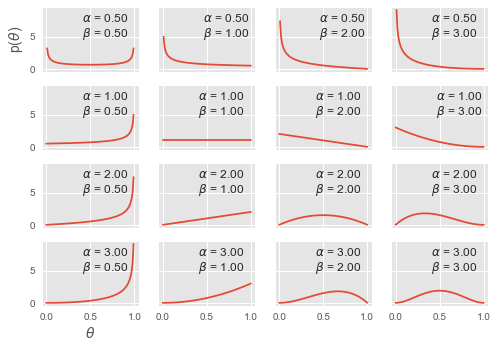

In [21]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True)
for i in range(len(params)):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i, j].legend(fontsize=12)
ax[3, 0].set_xlabel('$\\theta$', fontsize=14)
ax[0, 0].set_ylabel('p($\\theta$)', fontsize=14)

In [26]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

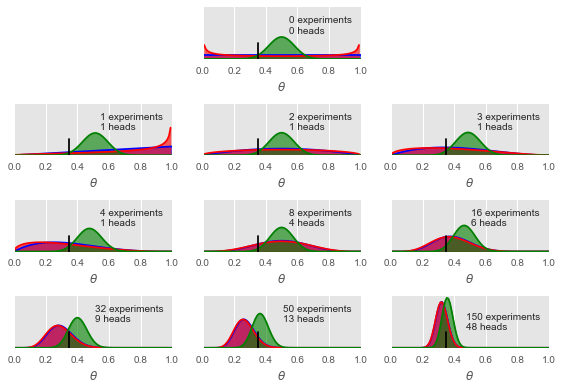

In [29]:
beta_params = [(1, 1), (.5, .5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
    else:
        plt.subplot(4, 3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
    
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.xlabel('$\\theta$')
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()

In [35]:
def naive_hpd(post):
    sns.kdeplot(post)
    HPD = np.percentile(post, [2.5, 97.5])
    plt.plot(HPD, [0, 0], label='HPD {:.2f} {:.2f}'.format(*HPD),
            linewidth=8, color='k')
    plt.legend(fontsize=16)
    plt.xlabel('$\\theta$', fontsize=14)
    plt.gca().axes.get_yaxis().set_ticks([])

(0, 1)

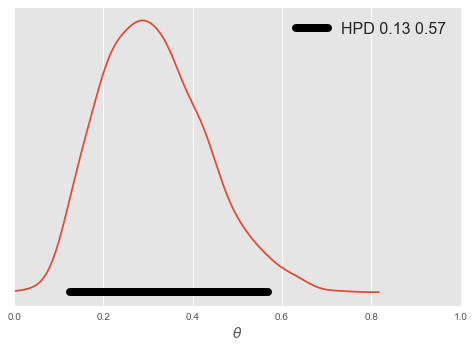

In [36]:
np.random.seed(1)
post = stats.beta.rvs(5, 11, size=1000)
naive_hpd(post)
plt.xlim(0, 1)

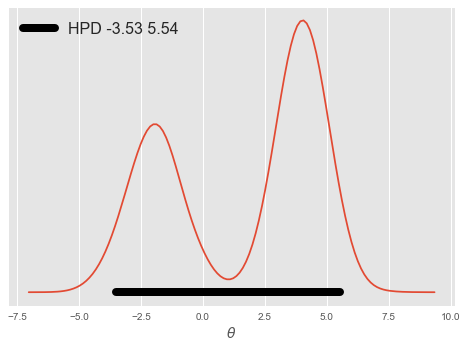

In [37]:
np.random.seed(1)
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))

naive_hpd(mix_norm)